# HW3: Problem 3 Classification Comparison with Synthetic Data


* Write a jupyter notebook. 
* It is essential that you include markdown cells explaining what you are doing at each step.

* You are going to compare the classification algorithms you have learned:

1.  Naive Bayes Classification
2.  Logistic Regression
3.  Quadradic Discriminant Analysis
4.  SVM using radial basis functions (RBF)
5.  Decision Tree
6.  KNN with K = 1

So make sure you run each of these algorithms on the data sets you will create to test.

* The goal is to create 4 synthetic data examples with 2D input data, 2 classes, to use to compare the algorithms. 
* You should use a combination of the following 3 synthetic functions to make your examples:
-   [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)
-   [sklearn.datasets.make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles)
-   [sklearn.datasets.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)

* You may use a combination of the above in the same example. For example, one class could come from a moon and the other class from a circle in the same example. You could also make one class is a combination of a moon bending oneway and a moon bending the other if that worked better for your example.
* Your examples should be such that:

1.  One of the four examples will be two well-separated blob classes. This example show that all the classifiers work pretty well (near-perfect or perfect classification)
2.  In the two of the data examples, the linear classifier (logistic regression) should do more poorly (both in training and test evaluation) than the others
3.  In the second example the quadratic should do very well (both in training and testing) but the linear classifier should do poorly. The SVM, Decision Tree, and KNN should also do better than the Logistic Regressioon
4.  In the third example you should be able to construct an example where the decision tree and KNN both overfit so the training error is small but the testing error is large, and linear regression does better
5.  The fourth example should be such that SVM and KNN do better than the others (in testing error)

In your evaluations, you should always split the data set into a training and test set using [sklearn.model_selection.train_test_split ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) and also create a report using [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)

There should be both an evaluation for training which means fit on training test on training (evaluation of fit) and testing which means fit on training but test on the testing data with the training fit!
Never, ever, fit on training data!!!

Since you are working with 2D data you should also create a set of visualized comparisons like those here:

<div
data-ephox-embed-iri="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="max-width: 650px; border: 1px solid #aaaaaa; box-shadow: rgba(0, 0, 0, 0.14) 0px 2px 2px 0px, rgba(0, 0, 0, 0.2) 0px 3px 1px -2px, rgba(0, 0, 0, 0.12) 0px 1px 5px 0px; padding: 10px; overflow: hidden; margin-bottom: 1em;">
<p><a
href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="text-decoration: none; color: inherit;"><img
src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png"
style="max-width: 180px; max-height: 180px; margin-left: 2em; float: right;" /></a>
<a
href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="text-decoration: none; color: inherit;"><span
style="font-size: 1.2em; display: block;">Classifier comparison</span>
<span style="margin-top: 0.5em; display: block;">A comparison of a
several classifiers in scikit-learn on synthetic datasets. The point of
this example is to illustrate the nature of decision boundaries of
different classifiers. This should be ta...</span> <span
style="color: #999999; display: block; margin-top: 0.5em;">scikit-learn</span></a></p>
</div>

You can use these visualizations and comparisons as inspiration but you should develop your own. Don\'t forget to see your random numbers! For some more idea on how to generate the synthetic data please read these examples too:

<div
data-ephox-embed-iri="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="max-width: 650px; border: 1px solid #aaaaaa; box-shadow: rgba(0, 0, 0, 0.14) 0px 2px 2px 0px, rgba(0, 0, 0, 0.2) 0px 3px 1px -2px, rgba(0, 0, 0, 0.12) 0px 1px 5px 0px; padding: 10px; overflow: hidden; margin-bottom: 1em;">
<p><a
href="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="text-decoration: none; color: inherit;"><img
src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png"
style="max-width: 180px; max-height: 180px; margin-left: 2em; float: right;" /></a>
<a
href="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="text-decoration: none; color: inherit;"><span
style="font-size: 1.2em; display: block;">2.3. Clustering</span> <span
style="margin-top: 0.5em; display: block;">Clustering of unlabeled data
can be performed with the module sklearn.cluster. Each clustering
algorithm comes in two variants: a class, that implements the fit method
to learn the clusters on trai...</span> <span
style="color: #999999; display: block; margin-top: 0.5em;">scikit-learn</span></a></p>
</div>


### Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

### Creating a classifiers dictionary to streamline the training and evaluation process for all classifiers

In [2]:
# Define classifiers dictionary
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "SVM (RBF)": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN (K=1)": KNeighborsClassifier(n_neighbors=1)
}

### Making use of the above provided 3 synthetic functions to create synthetic datasets

In [3]:
# Function to create synthetic datasets
def create_datasets():
    # Dataset 1: 2 well-separated blob classes (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)
    X1, y1 = make_blobs(n_samples=300, centers=2, random_state=42)

    # Dataset 2: Moons and circles (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles,
    # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)
    X2_circle, y2_circle = make_circles(n_samples=150, noise=0.1, factor=0.4, random_state=42)
    X2_moons, y2_moons = make_moons(n_samples=150, noise=0.1, random_state=42)
    X2 = np.concatenate((X2_circle, X2_moons + [2.5, 0]), axis=0)
    y2 = np.concatenate((y2_circle, y2_moons + 2), axis=0)

    # Dataset 3: Quadratic vs. Linear
    X3_quad = np.random.normal(loc=[0, 0], scale=[1, 1], size=(200, 2))
    X3_linear = np.random.normal(loc=[3, 3], scale=[1, 1], size=(200, 2))
    X3 = np.vstack((X3_quad, X3_linear))
    y3 = np.hstack((np.zeros(200), np.ones(200)))

    # Dataset 4: Overfitting Decision Tree and KNN
    np.random.seed(42)
    X4 = np.random.rand(300, 2) * 10
    y4 = (X4[:, 0] + X4[:, 1] > 10).astype(int)

    # Dataset 5: SVM and KNN Perform Better than Others
    X5, y5 = make_blobs(n_samples=300, centers=2, random_state=42)
    # Introduce some noise to make decision tree and KNN overfit
    X5 += np.random.normal(0, 0.5, X5.shape)

    return [(X1, y1), (X2, y2), (X3, y3), (X4, y4), (X5, y5)]

### Define a function for training and evaluating the classifiers. 
##### Note: Dataset is split into a train and test set using sklearn.model_selection.train_test_split and the model evaluation done using sklearn.metrics.classification_report. 

In [4]:
# Function to train and evaluate classifiers
def train_and_evaluate(X_train, X_test, y_train, y_test):
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)
        print(f"Classifier: {name}")
        print("Training Report:")
        print(classification_report(y_train, train_pred))
        print("Testing Report:")
        print(classification_report(y_test, test_pred))
        print("="*50)

### Function to plot decision boundaries

In [5]:
def plot_decision_boundary(X, y, clf, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

Dataset 1:
Classifier: Naive Bayes
Training Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       119

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Testing Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Classifier: Logistic Regression
Training Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       119

    accuracy                           1.00       240
   macro av

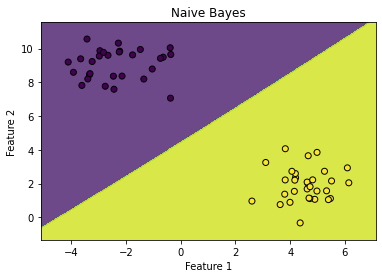

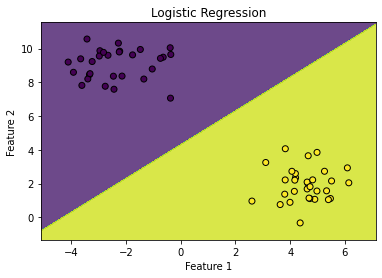

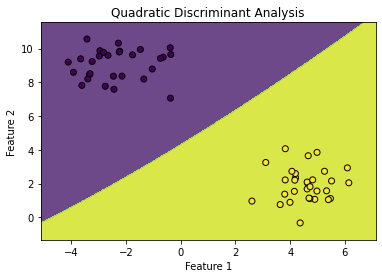

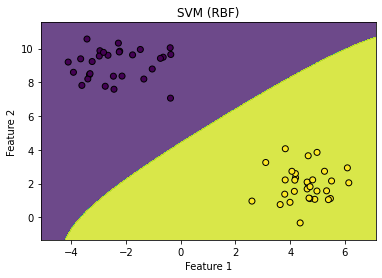

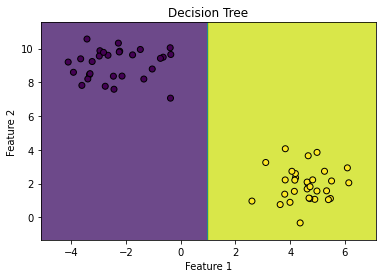

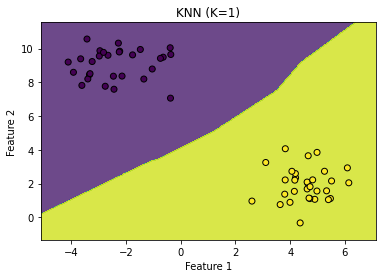

Dataset 2:
Classifier: Naive Bayes
Training Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       1.00      1.00      1.00        57
           2       0.88      0.86      0.87        57
           3       0.89      0.89      0.89        62

    accuracy                           0.94       240
   macro avg       0.94      0.94      0.94       240
weighted avg       0.94      0.94      0.94       240

Testing Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        18
           2       0.93      0.78      0.85        18
           3       0.75      0.92      0.83        13

    accuracy                           0.92        60
   macro avg       0.92      0.93      0.92        60
weighted avg       0.93      0.92      0.92        60

Classifier: Logistic Regression
Training Report:
             

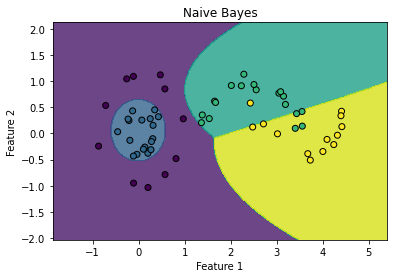

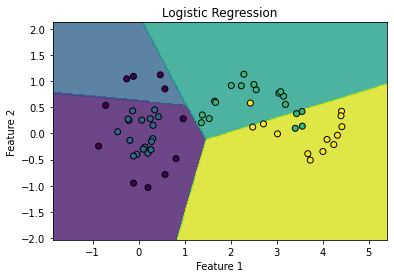

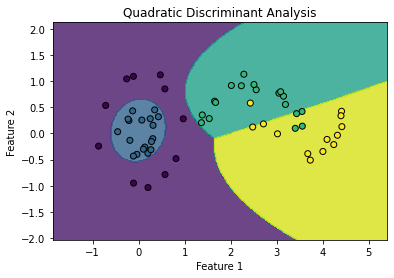

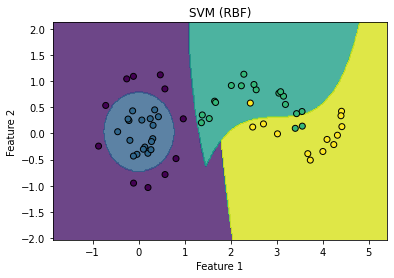

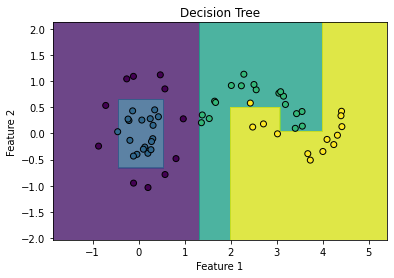

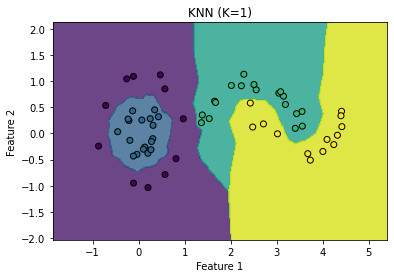

Dataset 3:
Classifier: Naive Bayes
Training Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       156
         1.0       0.99      0.98      0.99       164

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

Testing Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        44
         1.0       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Classifier: Logistic Regression
Training Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       156
         1.0       0.99      0.98      0.99       164

    accuracy                           0.99       320
   macro av

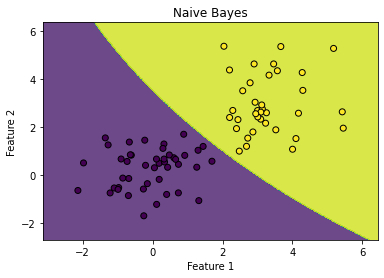

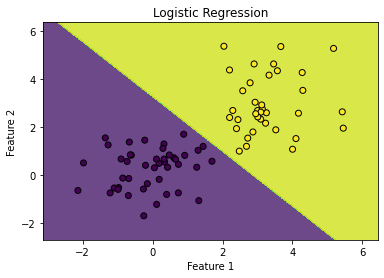

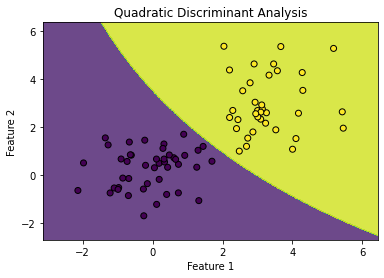

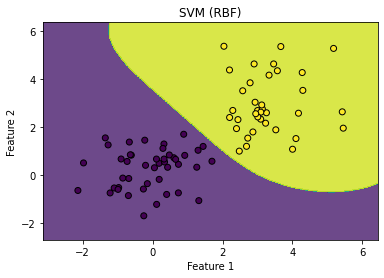

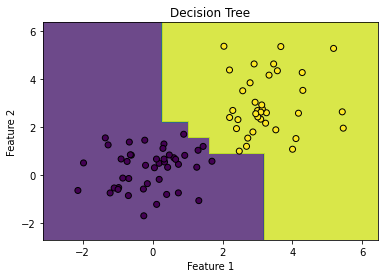

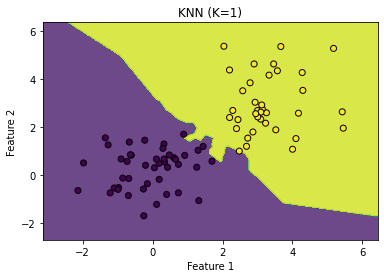

Dataset 4:
Classifier: Naive Bayes
Training Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       124
           1       1.00      0.91      0.95       116

    accuracy                           0.95       240
   macro avg       0.96      0.95      0.95       240
weighted avg       0.96      0.95      0.95       240

Testing Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.97      0.98        32

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Classifier: Logistic Regression
Training Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       116

    accuracy                           1.00       240
   macro av

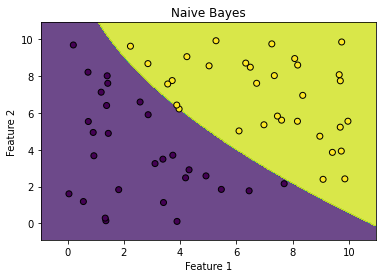

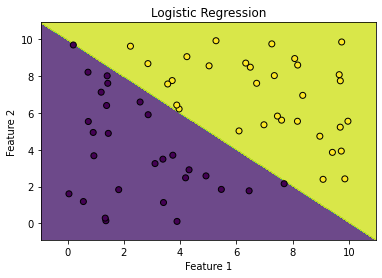

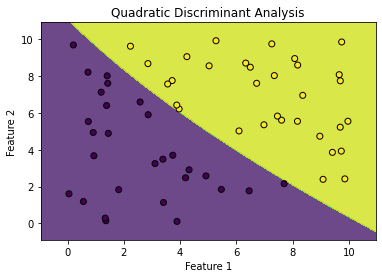

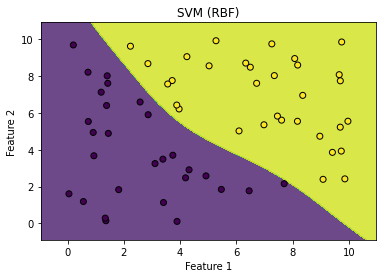

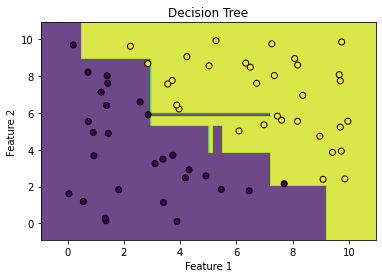

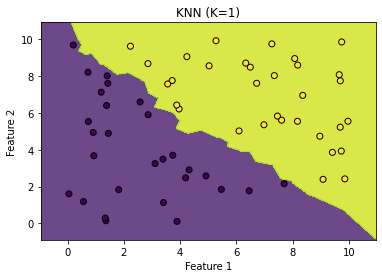

Dataset 5:
Classifier: Naive Bayes
Training Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       119

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Testing Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Classifier: Logistic Regression
Training Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       119

    accuracy                           1.00       240
   macro av

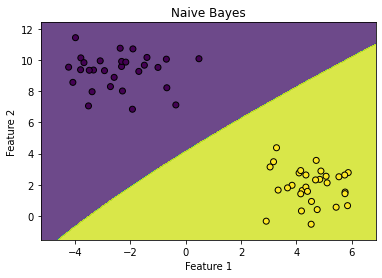

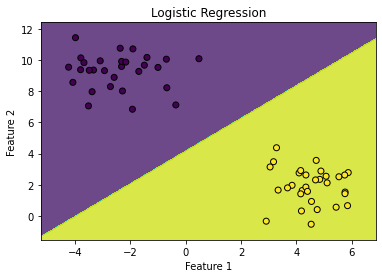

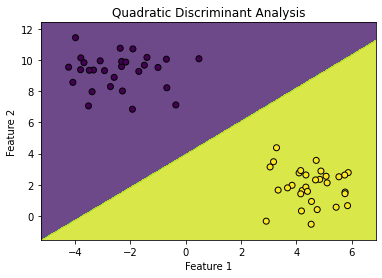

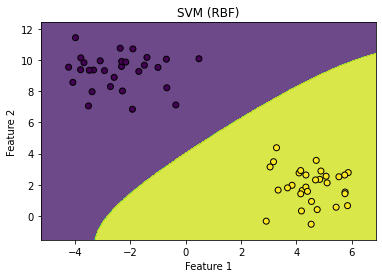

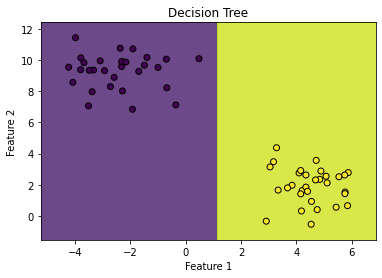

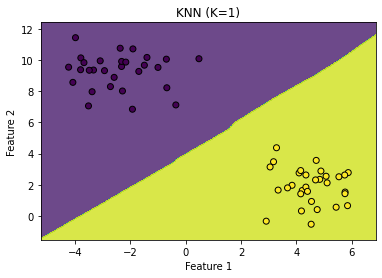

In [6]:
# Main function
def main():
    datasets = create_datasets()
    for i, (X, y) in enumerate(datasets):
        print(f"Dataset {i+1}:")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        train_and_evaluate(X_train, X_test, y_train, y_test)
        print("="*100)

        # Plot decision boundaries
        for name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            plt.figure()
            plot_decision_boundary(X_test, y_test, clf, title=name)

if __name__ == "__main__":
    main()

Dataset 1:
Classifier: Naive Bayes
Training Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       119

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Testing Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Classifier: Logistic Regression
Training Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       119

    accuracy                           1.00       240
   macro av

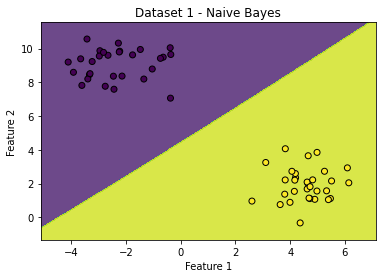

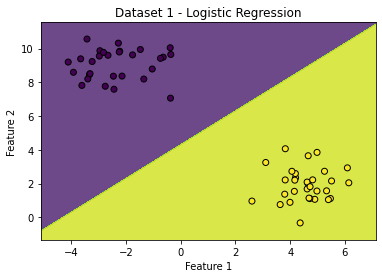

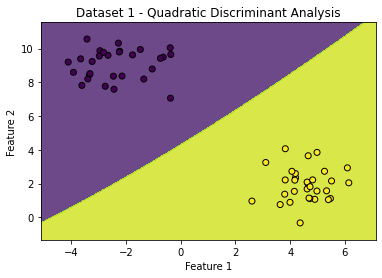

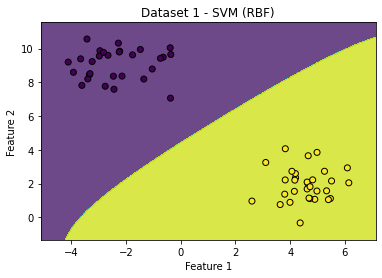

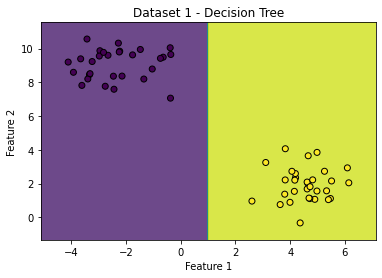

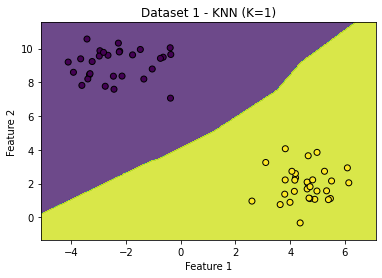

Dataset 2:
Classifier: Naive Bayes
Training Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       1.00      1.00      1.00        57
           2       0.88      0.86      0.87        57
           3       0.89      0.89      0.89        62

    accuracy                           0.94       240
   macro avg       0.94      0.94      0.94       240
weighted avg       0.94      0.94      0.94       240

Testing Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        18
           2       0.93      0.78      0.85        18
           3       0.75      0.92      0.83        13

    accuracy                           0.92        60
   macro avg       0.92      0.93      0.92        60
weighted avg       0.93      0.92      0.92        60

Classifier: Logistic Regression
Training Report:
             

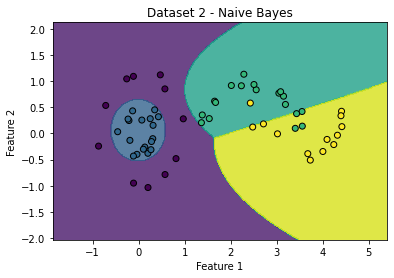

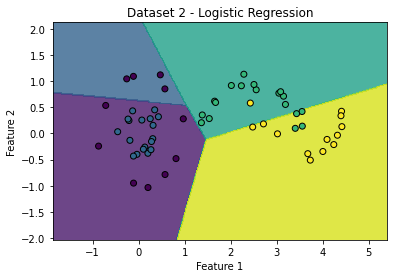

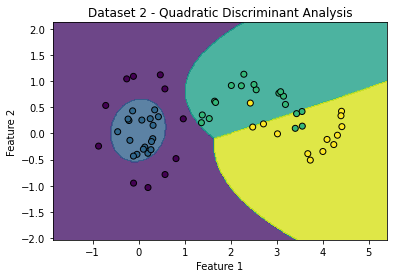

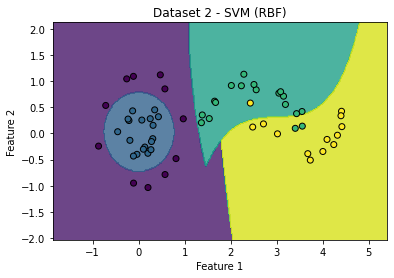

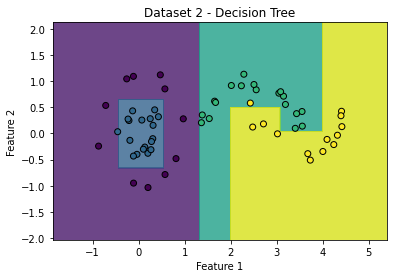

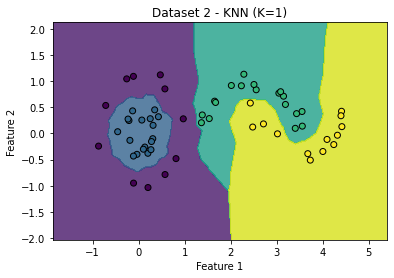

Dataset 3:
Classifier: Naive Bayes
Training Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       156
         1.0       0.99      0.97      0.98       164

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320

Testing Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        44
         1.0       1.00      0.97      0.99        36

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Classifier: Logistic Regression
Training Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       156
         1.0       0.99      0.97      0.98       164

    accuracy                           0.98       320
   macro av

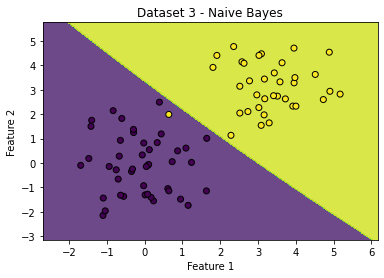

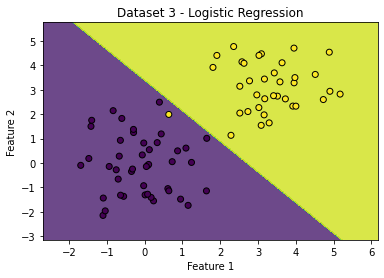

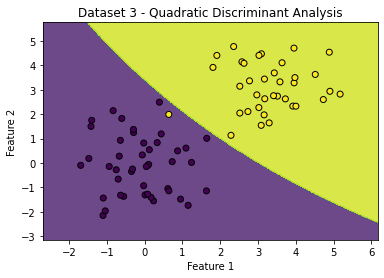

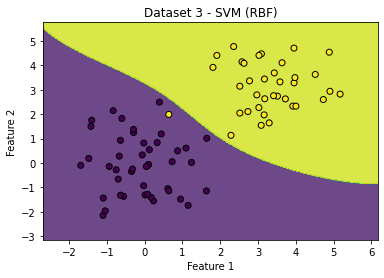

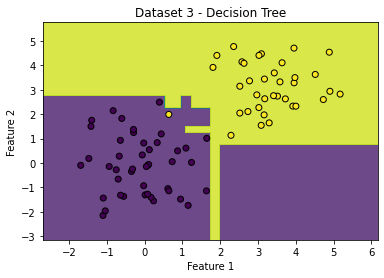

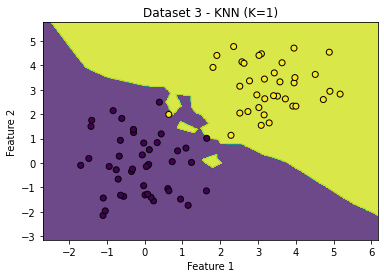

Dataset 4:
Classifier: Naive Bayes
Training Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       124
           1       1.00      0.91      0.95       116

    accuracy                           0.95       240
   macro avg       0.96      0.95      0.95       240
weighted avg       0.96      0.95      0.95       240

Testing Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.97      0.98        32

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Classifier: Logistic Regression
Training Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       116

    accuracy                           1.00       240
   macro av

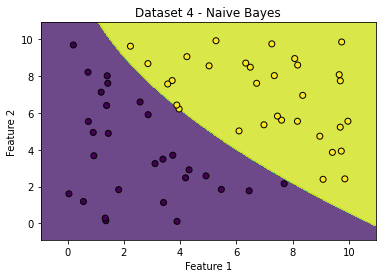

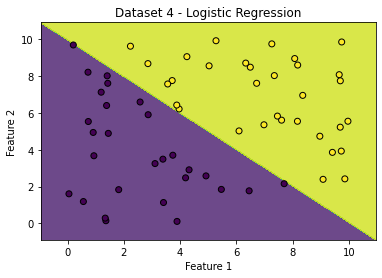

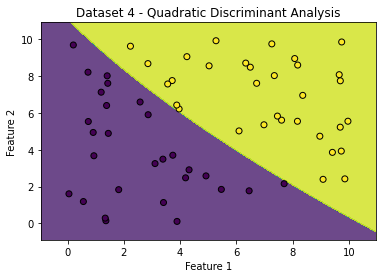

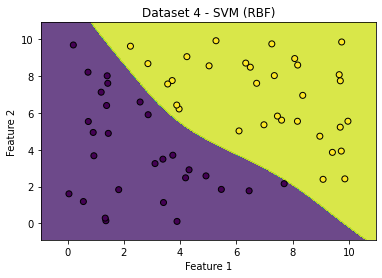

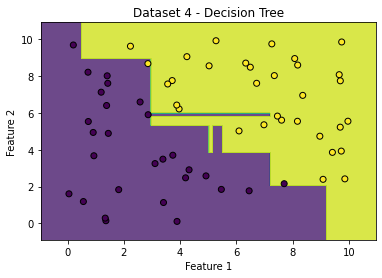

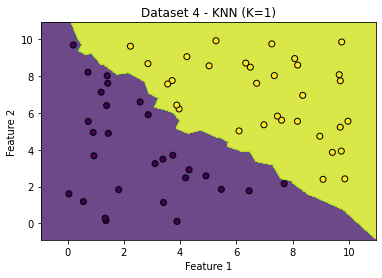

Dataset 5:
Classifier: Naive Bayes
Training Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       119

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Testing Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Classifier: Logistic Regression
Training Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       119

    accuracy                           1.00       240
   macro av

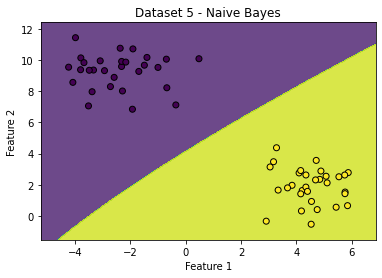

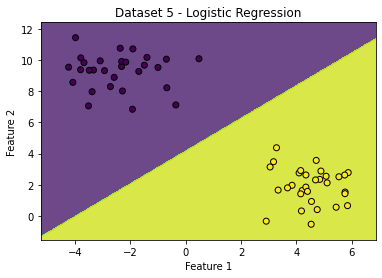

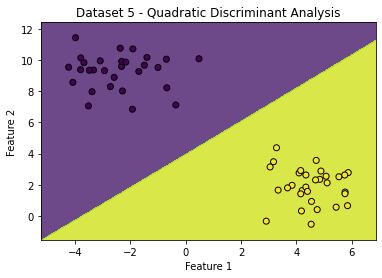

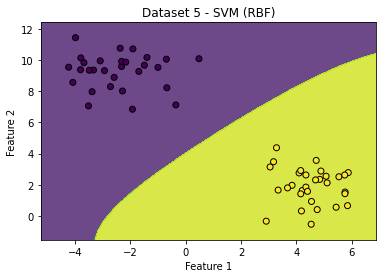

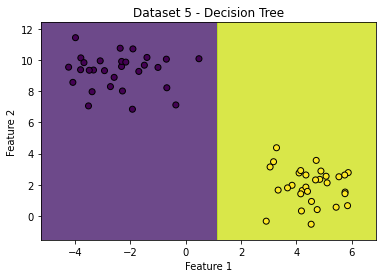

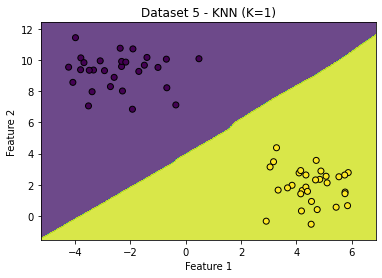

In [8]:
import matplotlib.pyplot as plt

# Main function
def main():
    datasets = create_datasets()
    for i, (X, y) in enumerate(datasets):
        print(f"Dataset {i+1}:")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        train_and_evaluate(X_train, X_test, y_train, y_test)
        print("="*100)

        # Plot decision boundaries for each classifier separately
        for name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            plot_decision_boundary(X_test, y_test, clf, title=f"Dataset {i+1} - {name}")
            plt.show()  # Display each plot separately

if __name__ == "__main__":
    main()
